In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
#Importing our dataset from csv file

dataset=pd.read_csv("/content/titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data[["Name", "Ticket", "Cabin", "Embarked"]]

,Name,Ticket,Cabin,Embarked
0,"Collander, Mr. Erik Gustaf",248740,G6,S
1,"Moen, Mr. Sigurd Hansen",348123,F G73,S
2,"Jensen, Mr. Hans Peder",350050,G6,S
3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,G6,S
4,"Davidson, Mr. Thornton",F.C. 12750,B71,S
...,...,...,...,...
886,"Nasser, Mrs. Nicholas (Adele Achem)",237736,G6,C
887,"Sirayanian, Mr. Orsen",2669,G6,C
888,"Cacic, Miss. Marija",315084,G6,S
889,"Petroff, Mr. Pastcho (""Pentcho"")",349215,G6,S


In [ ]:
data.isna().sum().sort_values(ascending=False).head(3)

Embarked       2
PassengerId    0
Survived       0
dtype: int64

In [ ]:
data.dropna(subset= ['Embarked'], inplace=True)

In [ ]:
data.Survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

<ipython-input-112-b5ef0e6fdb99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=data,ax=axes[0,0], palette='viridis')
<ipython-input-112-b5ef0e6fdb99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=data,ax=axes[0,1], palette='viridis')
<ipython-input-112-b5ef0e6fdb99>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=data,ax=axes[0,2], palette='viridis')
<ipython-input-112-b5ef0e6fdb99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

<Axes: xlabel='Age', ylabel='Density'>

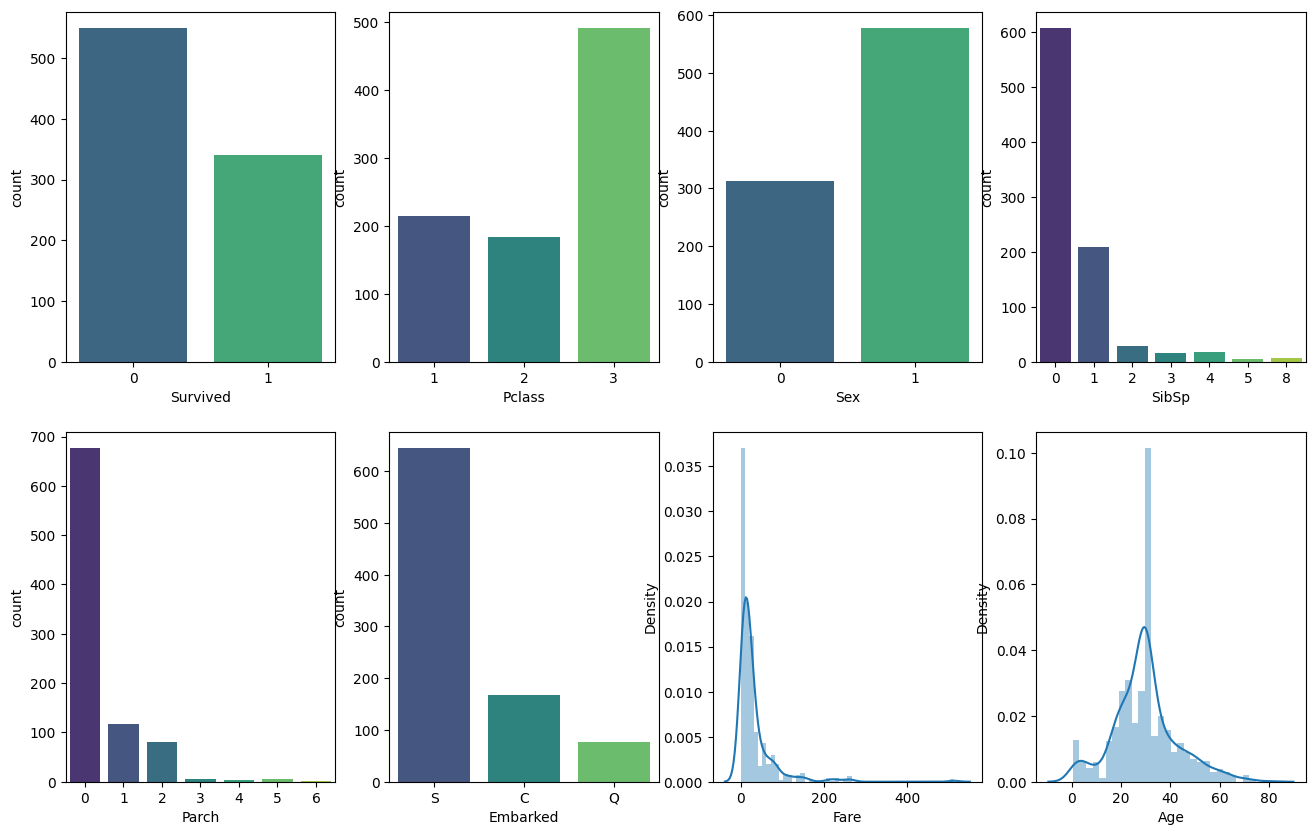

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived',data=data,ax=axes[0,0], palette='viridis')
sns.countplot(x='Pclass',data=data,ax=axes[0,1], palette='viridis')
sns.countplot(x='Sex',data=data,ax=axes[0,2], palette='viridis')
sns.countplot(x='SibSp',data=data,ax=axes[0,3], palette='viridis')
sns.countplot(x='Parch',data=data,ax=axes[1,0], palette='viridis')
sns.countplot(x='Embarked',data=data,ax=axes[1,1], palette='viridis')
sns.distplot(data['Fare'], kde=True,ax=axes[1,2])
sns.distplot(data['Age'].dropna(),kde=True,ax=axes[1,3])

<Axes: xlabel='Survived', ylabel='count'>

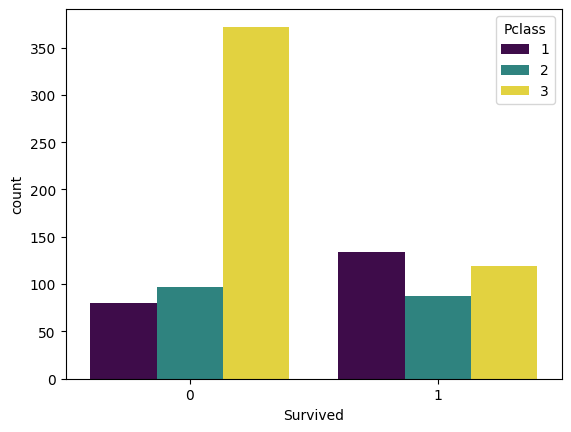

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=data, palette='viridis')

In [ ]:
data.groupby('Pclass').Survived.mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

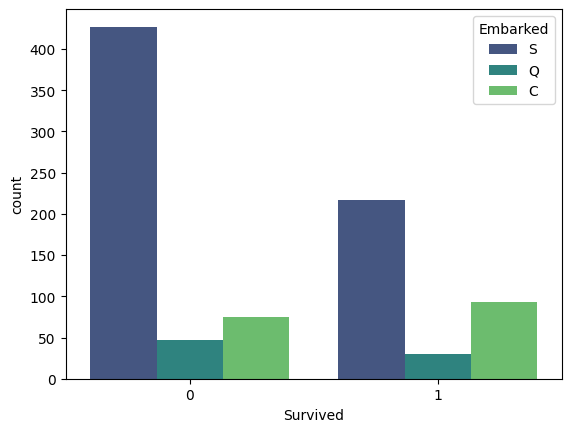

In [ ]:
sns.countplot(x='Survived', hue='Embarked', data=data, palette='viridis')

<Axes: xlabel='Age', ylabel='Count'>

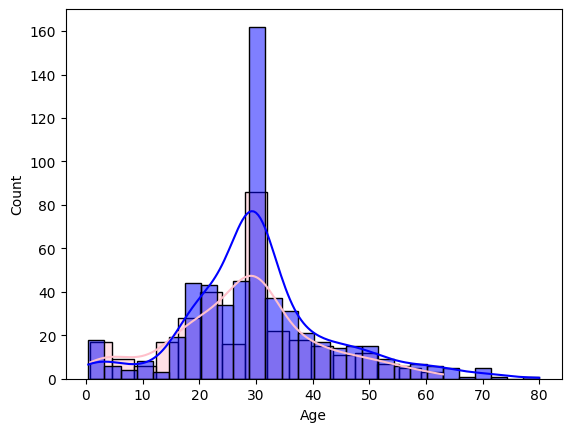

In [ ]:
sns.histplot(data[data['Sex'] == 0].Age, kde=True, color = 'pink')
sns.histplot(data[data['Sex'] == 1].Age, kde=True, color = 'blue')

<ipython-input-117-6b149de39f3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(data.corr().round(decimals=3), annot=True)


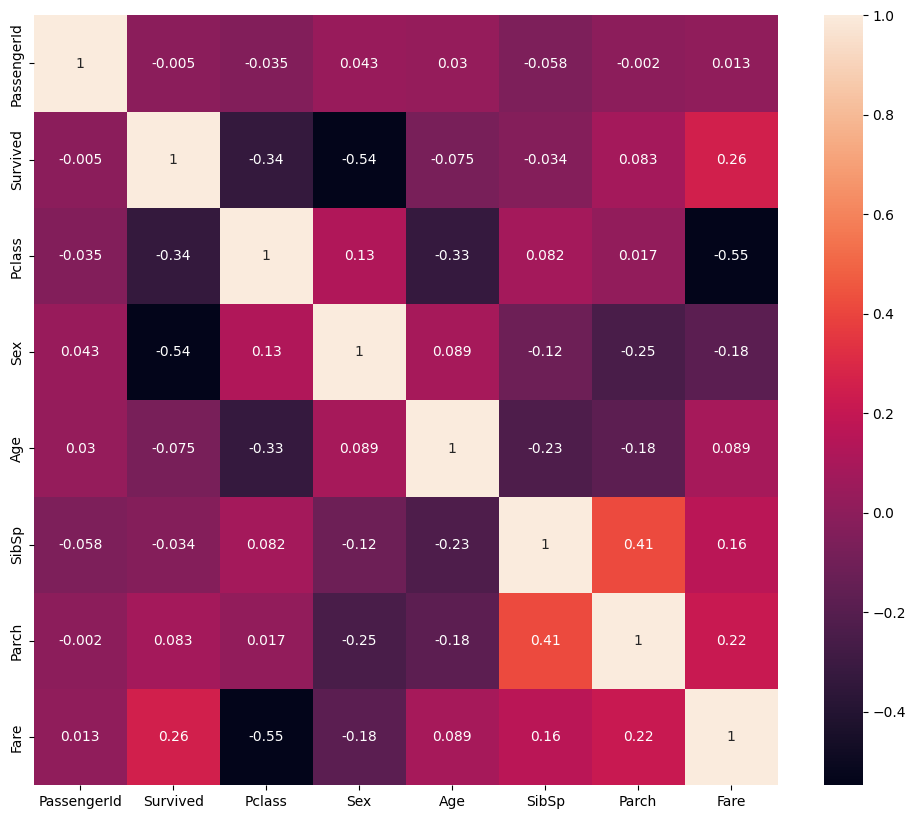

In [ ]:
s , ax = plt.subplots( figsize =( 12 , 10 ) )
s = sns.heatmap(data.corr().round(decimals=3), annot=True)

In [ ]:
data['Title'] = data['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S,Mr


In [ ]:
Title_Dictionary = {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mrs",
                    "Mrs":"Mrs",
                    "Master":"Master"
                    }

data['Title'] = data.Title.replace(Title_Dictionary)
# for x in Title_Dictionary.keys():
#         data['Title']=data.Title.str.replace(x, Title_Dictionary[x], regex=True)
data['Title'] = data['Title'].astype("string")
data.Title

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title, Length: 889, dtype: string

<ipython-input-120-15d65309c2bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Title'], palette='viridis')


<Axes: xlabel='Title', ylabel='count'>

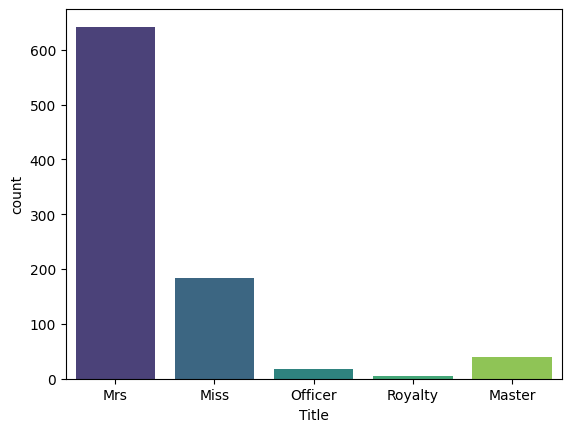

In [ ]:
sns.countplot(x=data['Title'], palette='viridis')

<Axes: xlabel='Title', ylabel='count'>

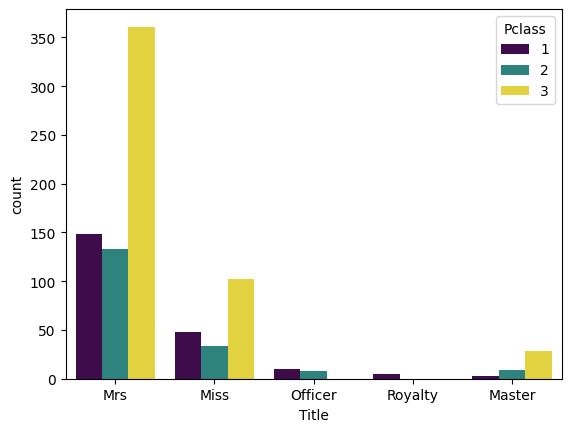

In [ ]:
sns.countplot(x='Title', hue='Pclass', data=data, palette='viridis')

<Axes: xlabel='Title', ylabel='count'>

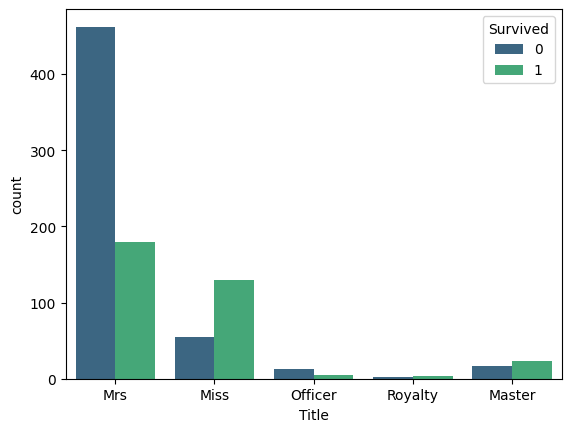

In [ ]:
sns.countplot(x='Title', hue='Survived', data=data, palette='viridis')

In [ ]:
data['familySize'] = data["SibSp"]+data["Parch"]

<Axes: xlabel='familySize', ylabel='Count'>

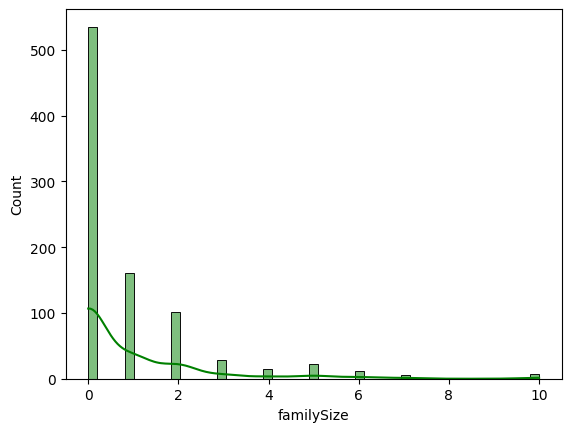

In [ ]:
sns.histplot(data['familySize'],kde = True, color='green')

<ipython-input-125-d82661e21d8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data[data['Survived'] == 1]['familySize'], palette='viridis')


<Axes: xlabel='familySize', ylabel='count'>

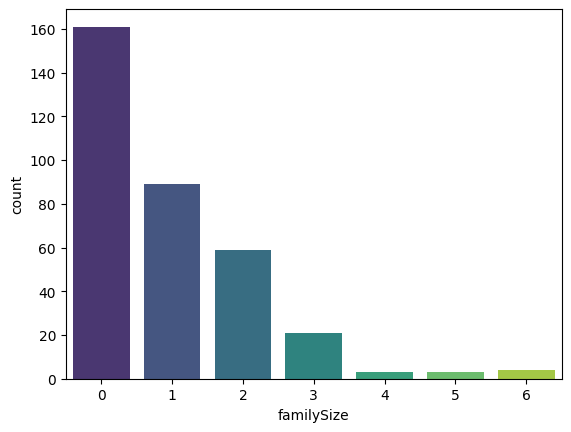

In [ ]:
# prompt: i wanna countplot the survived==1 column in function of familysize with the pastel palette

sns.countplot(x = data[data['Survived'] == 1]['familySize'], palette='viridis')


<ipython-input-126-039934f71f8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(data.corr().round(decimals=3), annot=True)


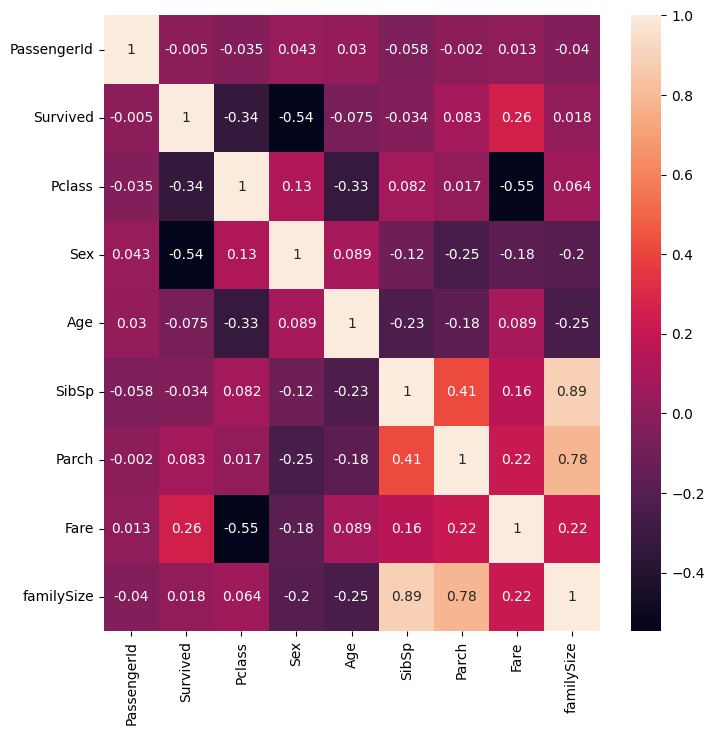

In [ ]:
s , ax = plt.subplots( figsize =( 8 , 8 ) )
s = sns.heatmap(data.corr().round(decimals=3), annot=True)

In [ ]:
Y = data["Survived"]
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'familySize']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.6, random_state=42)

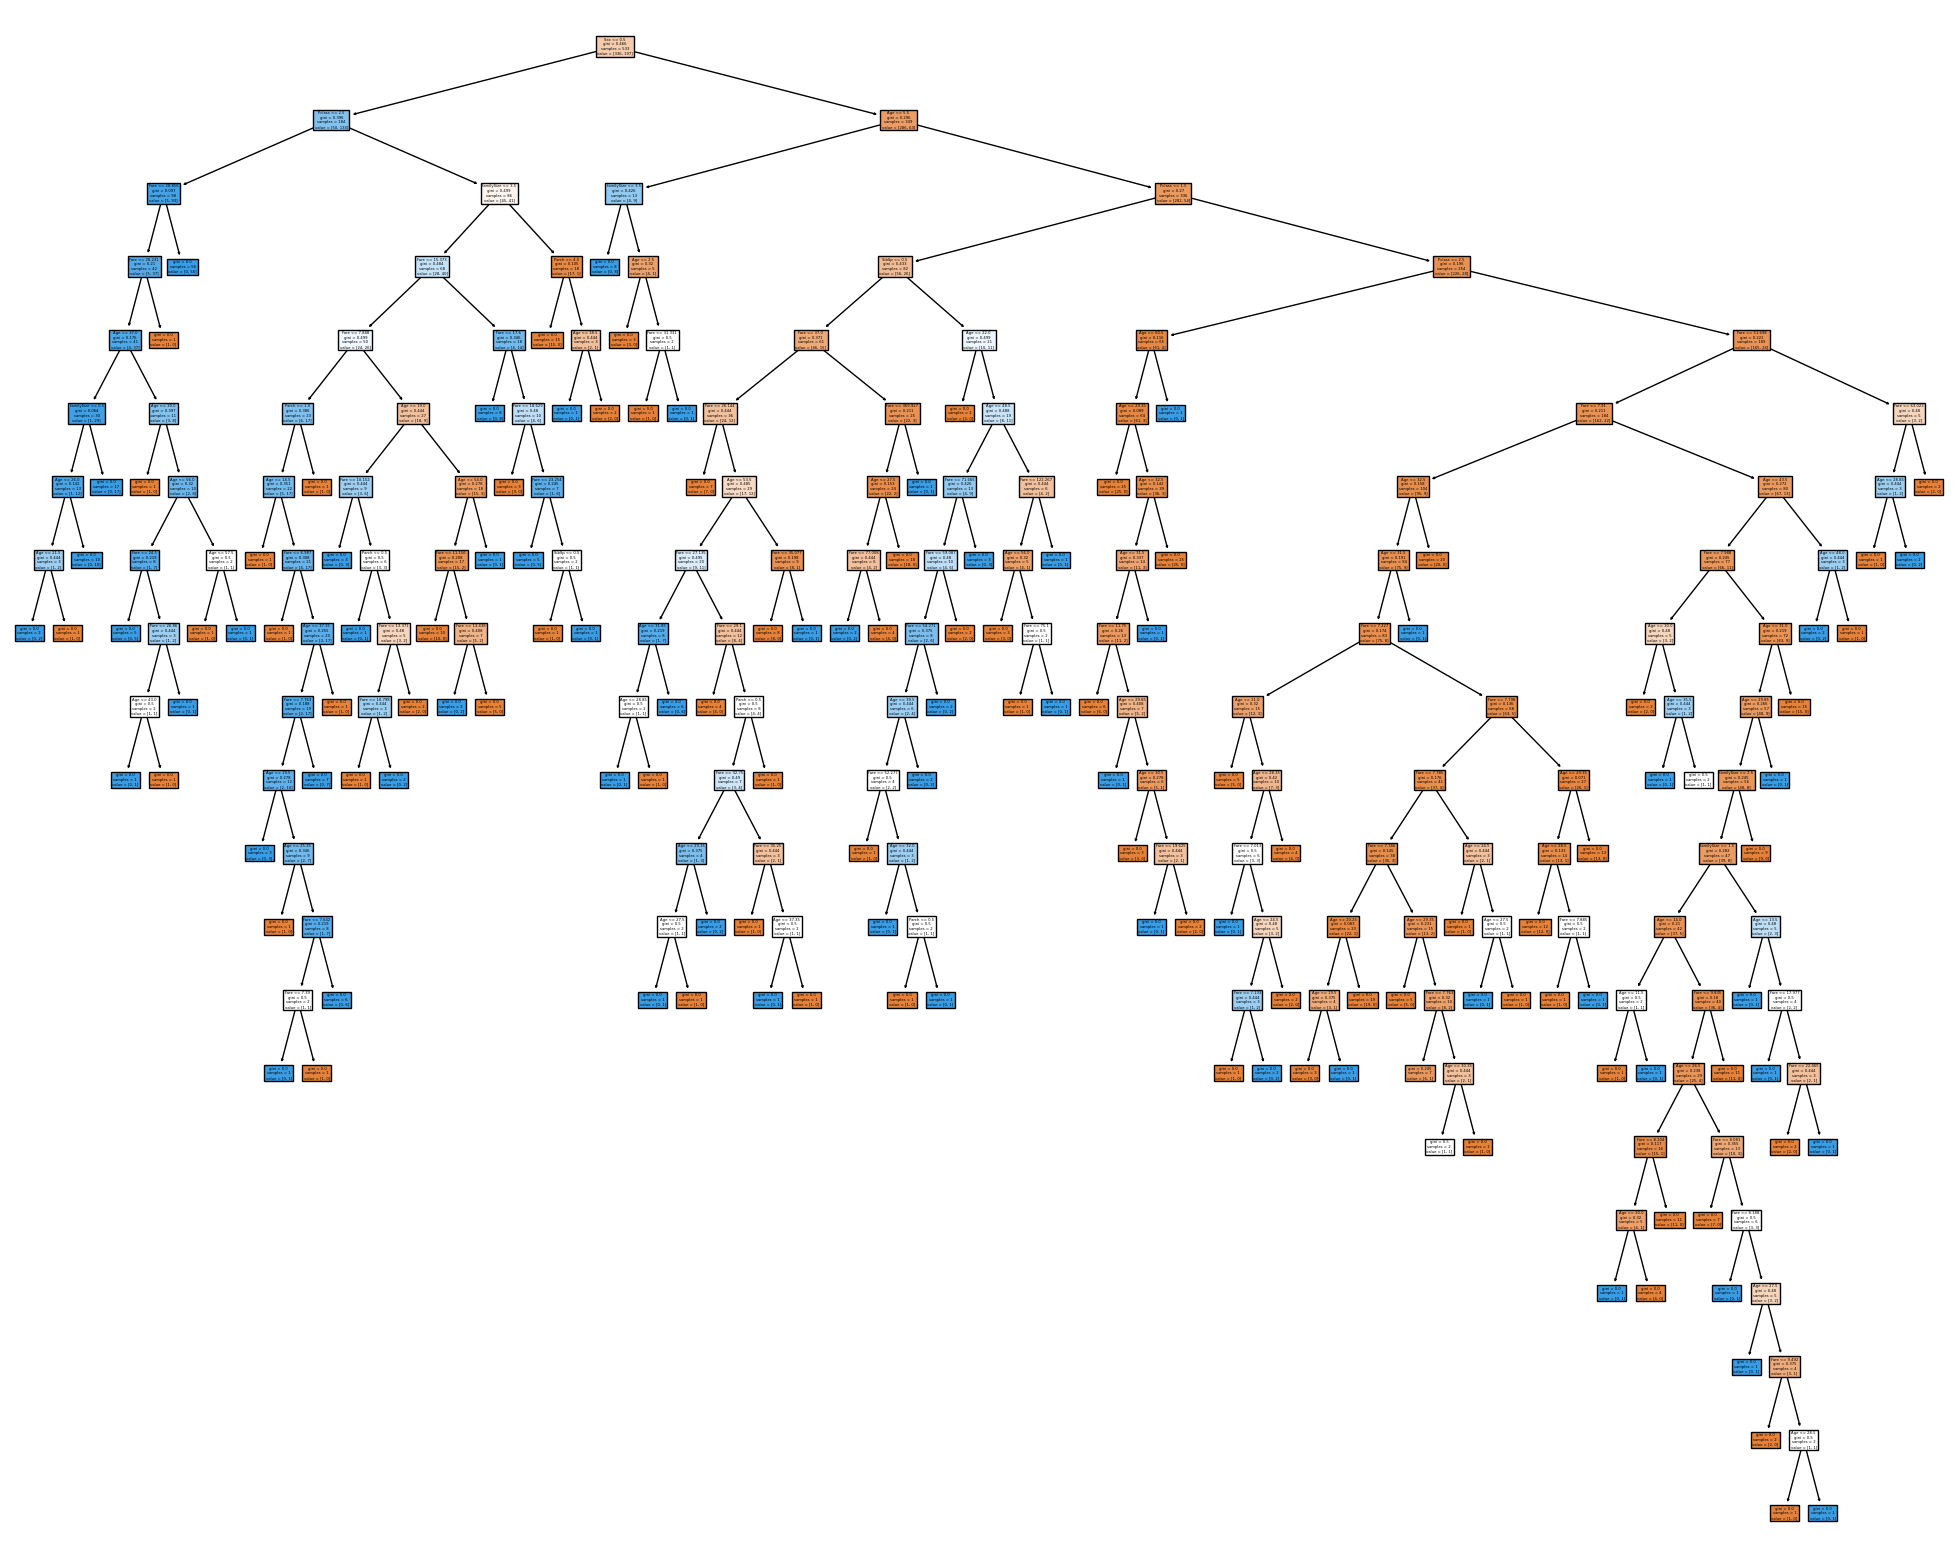

In [ ]:
dtc = DecisionTreeClassifier().fit(X_train, Y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc,feature_names = X.columns, filled = True)
plt.show()

In [ ]:
Y_pred = dtc.predict(X_test)
print( "Decision tree default accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Decision tree default accuracy : 0.75


In [ ]:
#exploring different parameters to have a better tree using gridsearch
params = {
        'max_depth': np.arange(2,20, 2),
        'min_samples_split' : np.arange(2,10, 2),
        'min_samples_leaf' : [1,2]
}
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = params).fit(X_train, Y_train)
clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

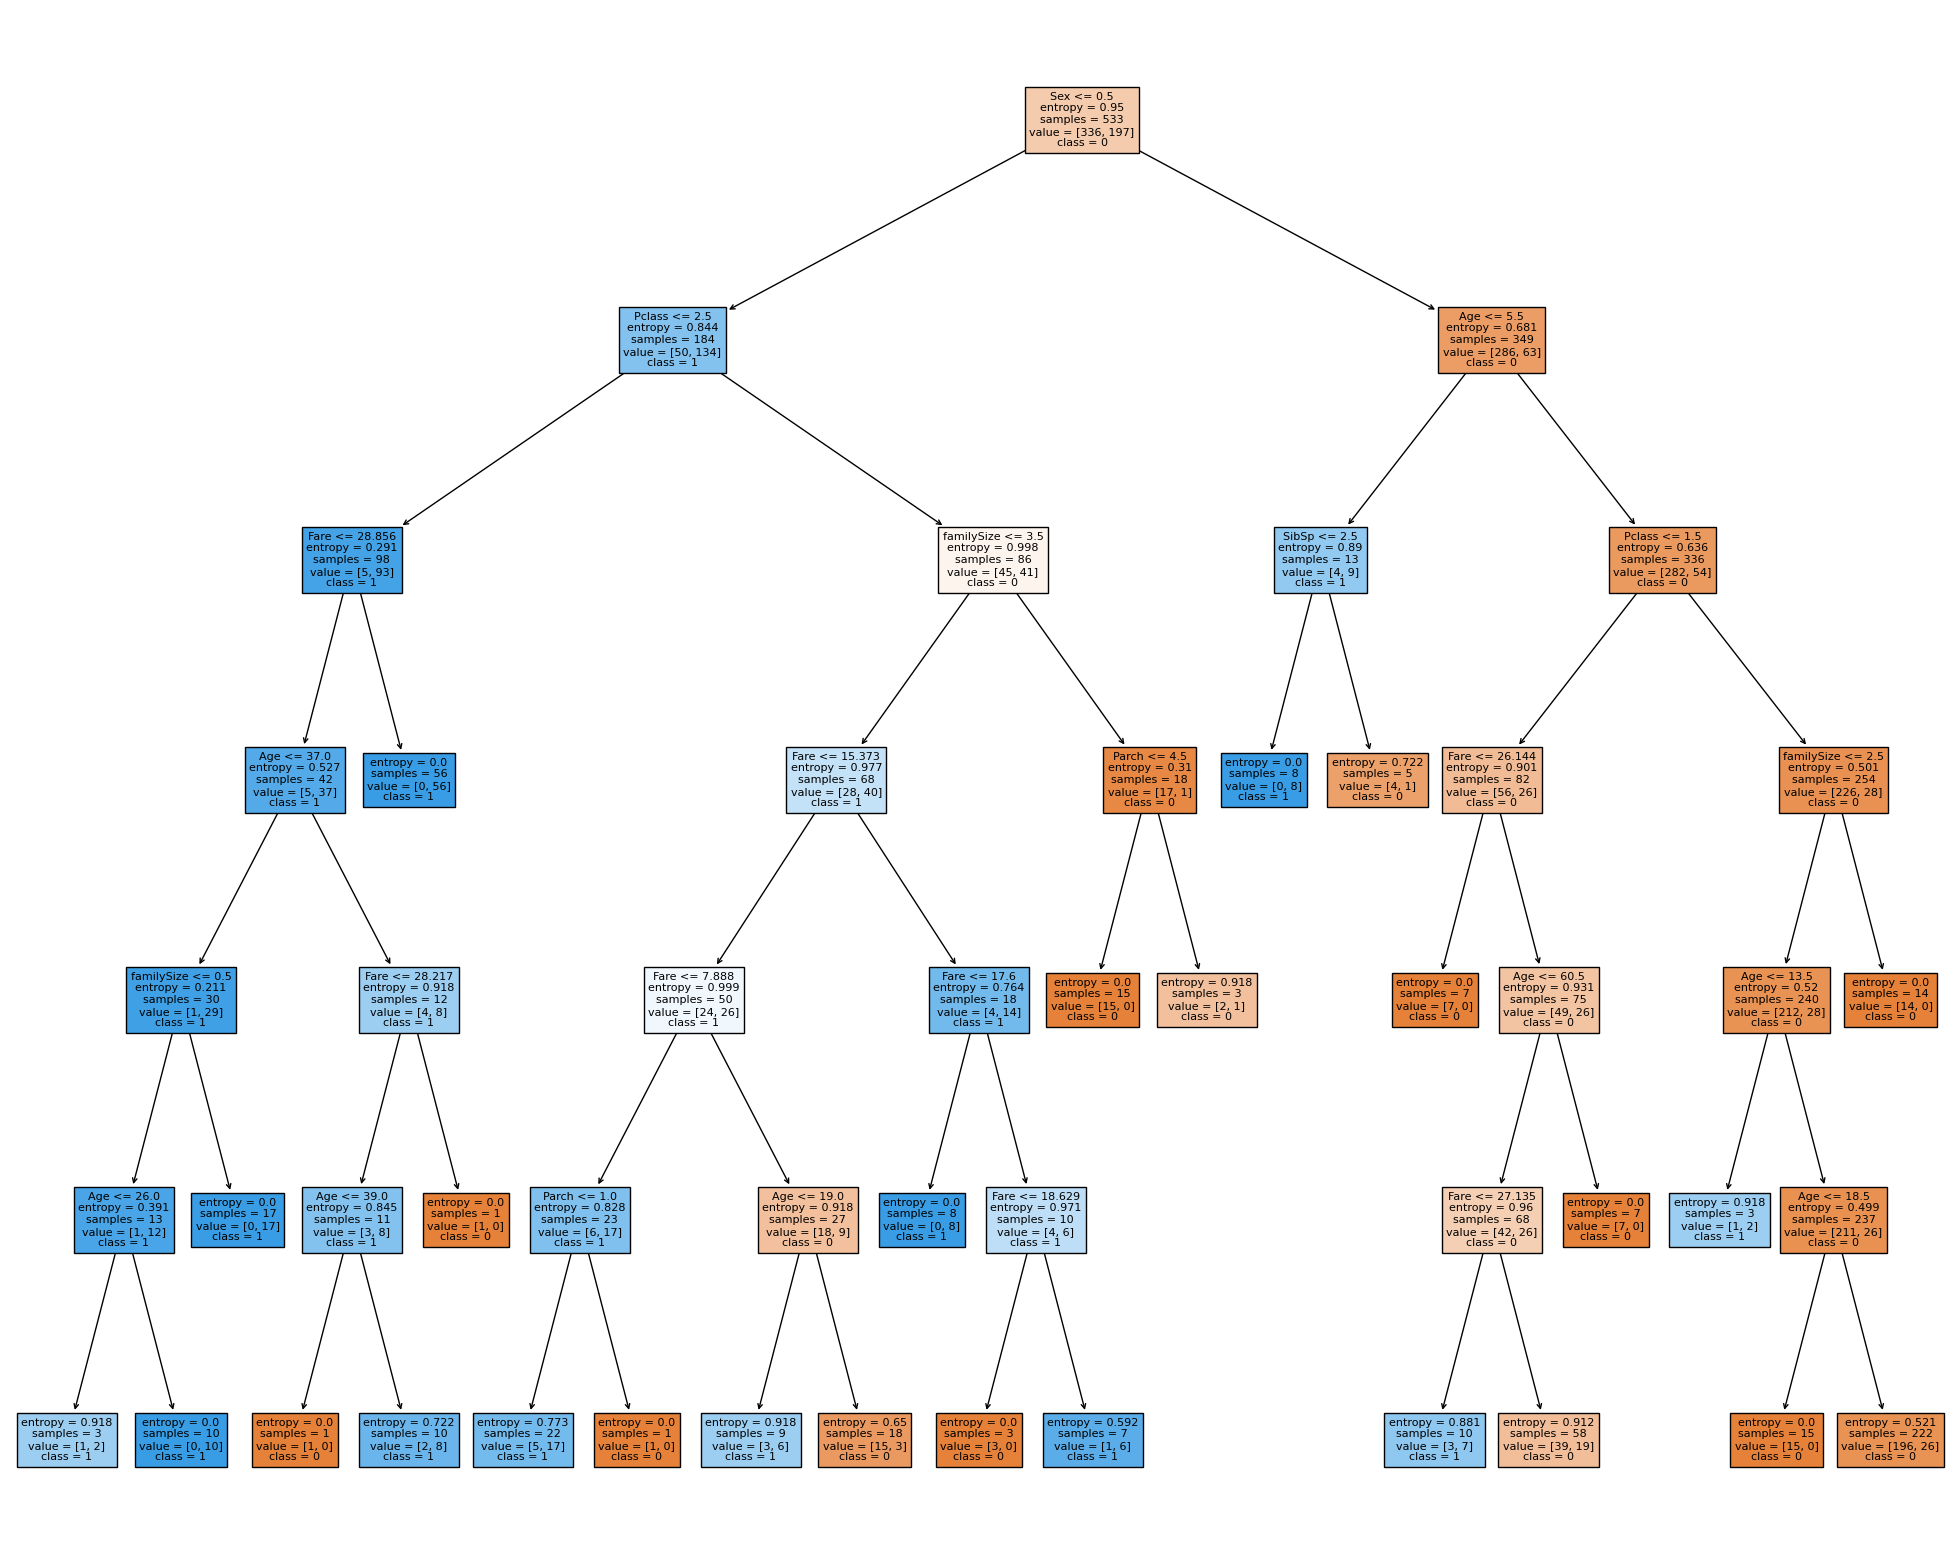

In [ ]:
opt_tree = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'],min_samples_leaf= clf.best_params_['min_samples_leaf'], min_samples_split=clf.best_params_['min_samples_split'], criterion='entropy').fit(X_train,Y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(opt_tree, feature_names = X.columns, filled = True, class_names=['0','1'])
plt.show()

In [ ]:
Y_pred = opt_tree.predict(X_test)
print( "Decision tree optimized accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Decision tree optimized accuracy : 0.837


In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print( "Random Forest default accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest default accuracy : 0.815


In [ ]:
params = {
        'n_estimators' : np.arange(50,200, 5)
}
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid = params).fit(X_train, Y_train)
clf.best_params_

{'n_estimators': 50}

In [ ]:
opt_rfc = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'])
opt_rfc = rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print( "Random Forest optimized accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest optimized accuracy : 0.801
